In [211]:
import pandas as pd

df = pd.read_csv('datasets/cleaned_warsaw_weather_dataset.csv', sep=';')

df.describe()

,year,month,day,temp_max,temp_min,was_raining_previous_day
count,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000
mean,2021.360238,6.502709,15.706934,13.932286,7.115926,0.385157
std,1.517636,3.428360,8.829197,9.308810,6.897279,0.486764
min,2019.000000,1.000000,1.000000,-14.000000,-18.000000,0.000000
25%,2020.000000,4.000000,8.000000,6.000000,1.000000,0.000000
50%,2021.000000,6.000000,16.000000,14.000000,7.000000,0.000000
75%,2023.000000,9.000000,23.000000,22.000000,13.000000,1.000000
max,2024.000000,12.000000,31.000000,37.000000,23.000000,1.000000


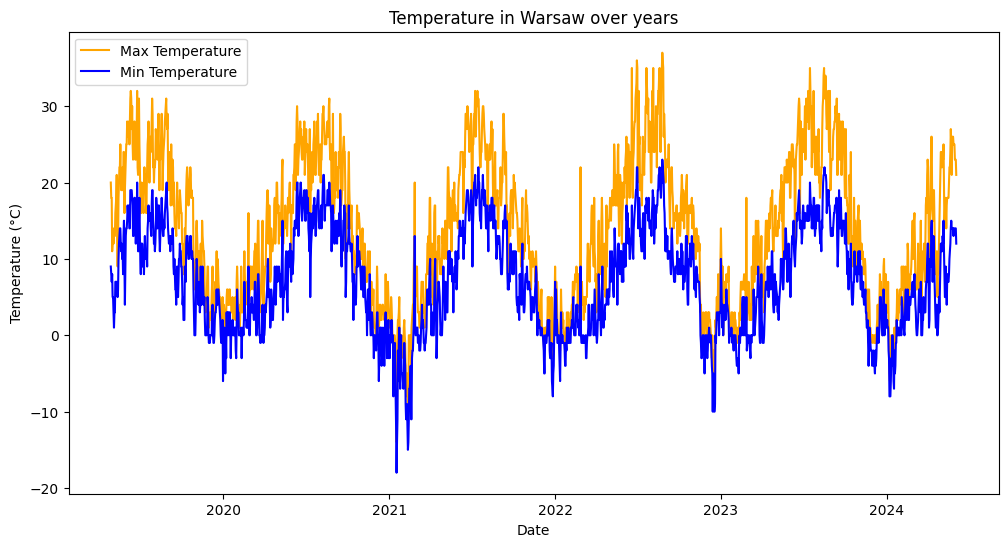

In [214]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('datasets/visualization_warsaw_weather_dataset.csv', sep=';')

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['temp_max'], label='Max Temperature', color='orange')
plt.plot(df['date'], df['temp_min'], label='Min Temperature', color='blue')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Exact temperature in Warsaw over years')
plt.legend()
plt.show()

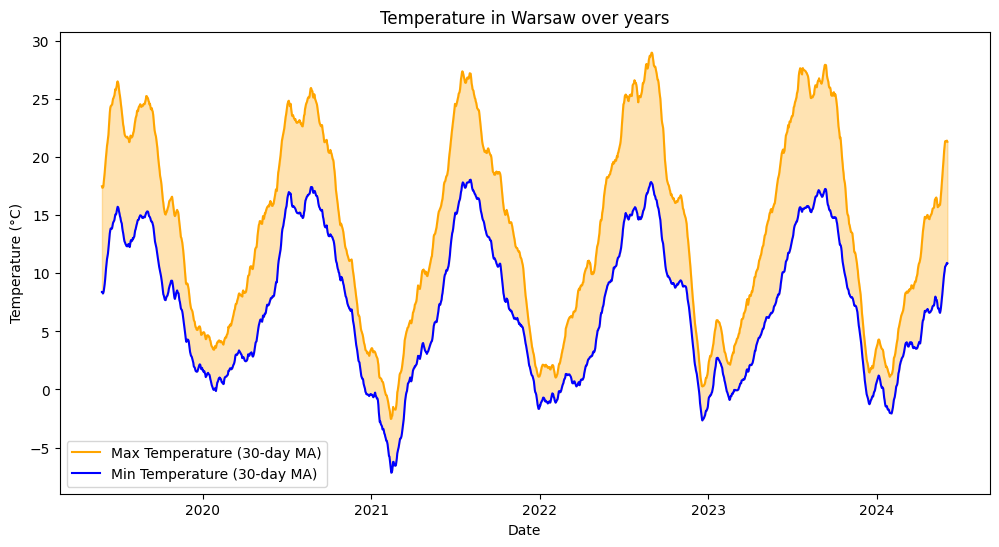

In [213]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('datasets/visualization_warsaw_weather_dataset.csv', sep=';')

df['date'] = pd.to_datetime(df['date'])

# Calculate the rolling mean - moving average (30-day window)
df['temp_max_ma30'] = df['temp_max'].rolling(window=30).mean()
df['temp_min_ma30'] = df['temp_min'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_max_ma30'], label='Max Temperature (30-day MA)', color='orange')
plt.plot(df['date'], df['temp_min_ma30'], label='Min Temperature (30-day MA)', color='blue')
plt.fill_between(df['date'], df['temp_max_ma30'], df['temp_min_ma30'], color='orange', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Warsaw over years')
plt.legend()
plt.show()


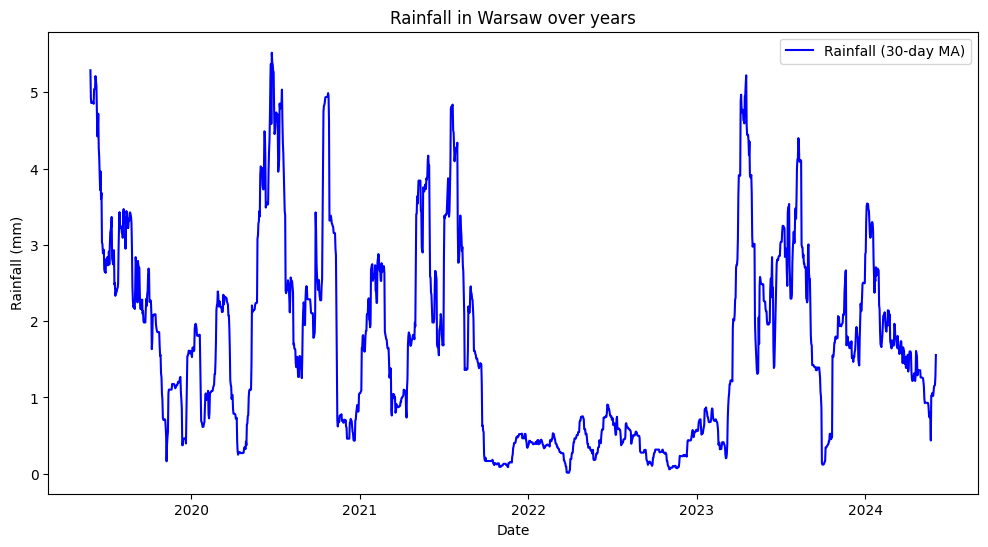

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('datasets/visualization_warsaw_weather_dataset.csv', sep=';')

df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime(df['date'])

# Calculate the rolling mean - moving average (30-day window)
df['rain_ma30'] = df['rain'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['rain_ma30'], label='Rainfall (30-day MA)', color='blue')

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall in Warsaw over years')
plt.legend()
plt.show()


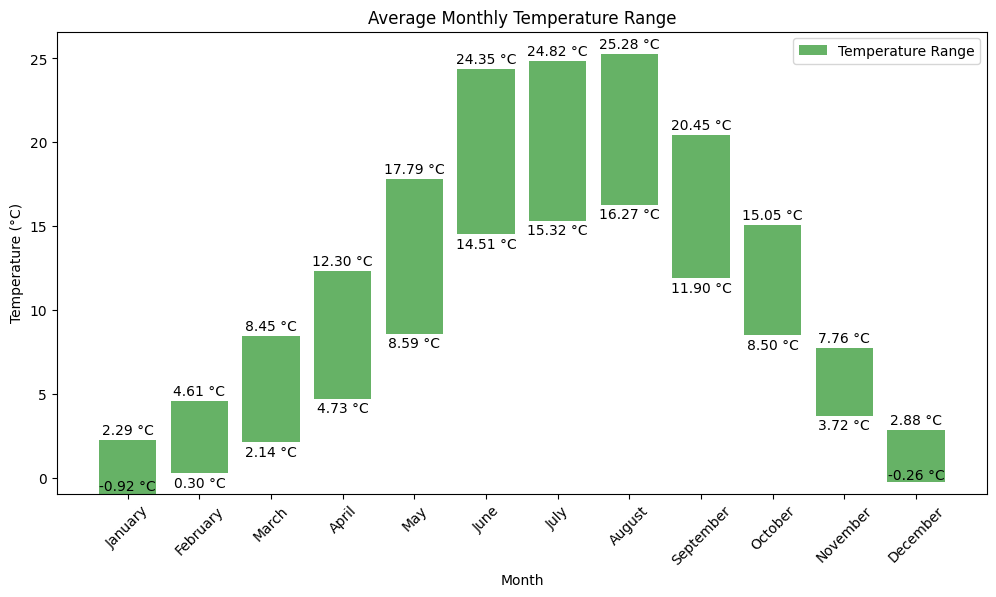

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


df = pd.read_csv('datasets/cleaned_warsaw_weather_dataset.csv', sep=';')

monthly_avg = df.groupby(['month']).agg({'temp_max': 'mean', 'temp_min': 'mean'}).reset_index()
monthly_avg['temp_range'] = monthly_avg['temp_max'] - monthly_avg['temp_min']

plt.figure(figsize=(12, 6))

bars = plt.bar(monthly_avg['month'], monthly_avg['temp_range'], bottom=monthly_avg['temp_min'],
			label='Temperature Range', color='green', alpha=0.6)

for index, (bar, temp_min, temp_max) in enumerate(zip(bars, monthly_avg['temp_min'], monthly_avg['temp_max'])):
	
	if index == 0 or index == 11: 
		plt.text(bar.get_x() + bar.get_width() / 2, temp_min, f'{temp_min:.2f} °C', ha='center', va='bottom')
	else:
		plt.text(bar.get_x() + bar.get_width() / 2, temp_min - 1, f'{temp_min:.2f} °C', ha='center', va='bottom')
	plt.text(bar.get_x() + bar.get_width() / 2, temp_max + 1, f'{temp_max:.2f} °C', ha='center', va='top')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Temperature Range')
plt.xticks(rotation=45)
plt.xticks(monthly_avg['month'], [calendar.month_name[i] for i in monthly_avg['month']])
plt.legend()
plt.show()


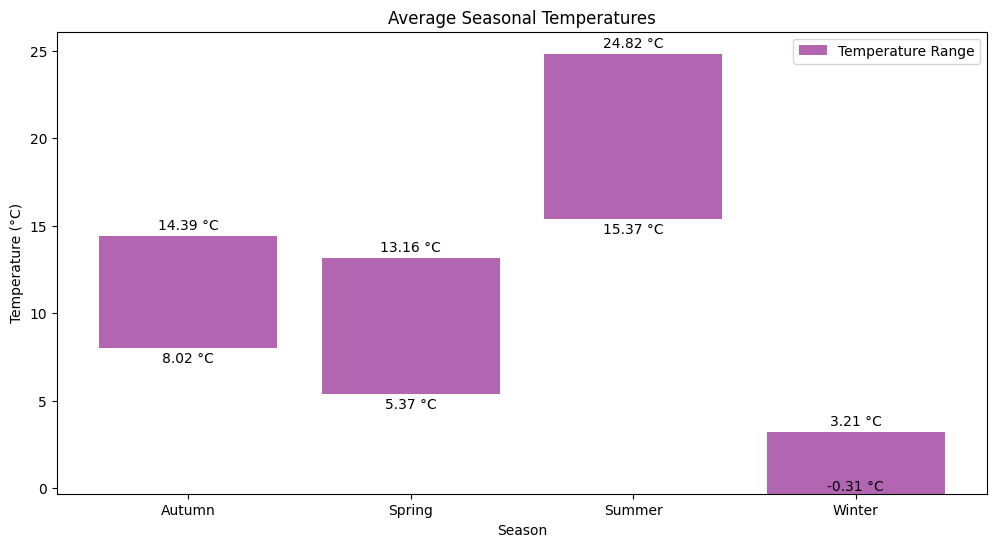

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/cleaned_warsaw_weather_dataset.csv', sep=';')

def get_season(month):
	if month in [12, 1, 2]:
		return 'Winter'
	elif month in [3, 4, 5]:
		return 'Spring'
	elif month in [6, 7, 8]:
		return 'Summer'
	else:
		return 'Autumn'

df['season'] = df['month'].apply(get_season)

seasonal_avg = df.groupby('season').agg({'temp_max': 'mean', 'temp_min': 'mean'}).reset_index()
seasonal_avg['temp_range'] = seasonal_avg['temp_max'] - seasonal_avg['temp_min']

plt.figure(figsize=(12, 6))
bars = plt.bar(seasonal_avg['season'], seasonal_avg['temp_range'], bottom=seasonal_avg['temp_min'],
               label='Temperature Range', color='purple', alpha=0.6)

for index, (bar, temp_min, temp_max) in enumerate(zip(bars, seasonal_avg['temp_min'], seasonal_avg['temp_max'])):
	if index == 3: 
		plt.text(bar.get_x() + bar.get_width() / 2, temp_min, f'{temp_min:.2f} °C', ha='center', va='bottom')
	else:
		plt.text(bar.get_x() + bar.get_width() / 2, temp_min - 1, f'{temp_min:.2f} °C', ha='center', va='bottom')
	plt.text(bar.get_x() + bar.get_width() / 2, temp_max + 1, f'{temp_max:.2f} °C', ha='center', va='top')

plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.title('Average Seasonal Temperatures')
plt.legend()
plt.show()


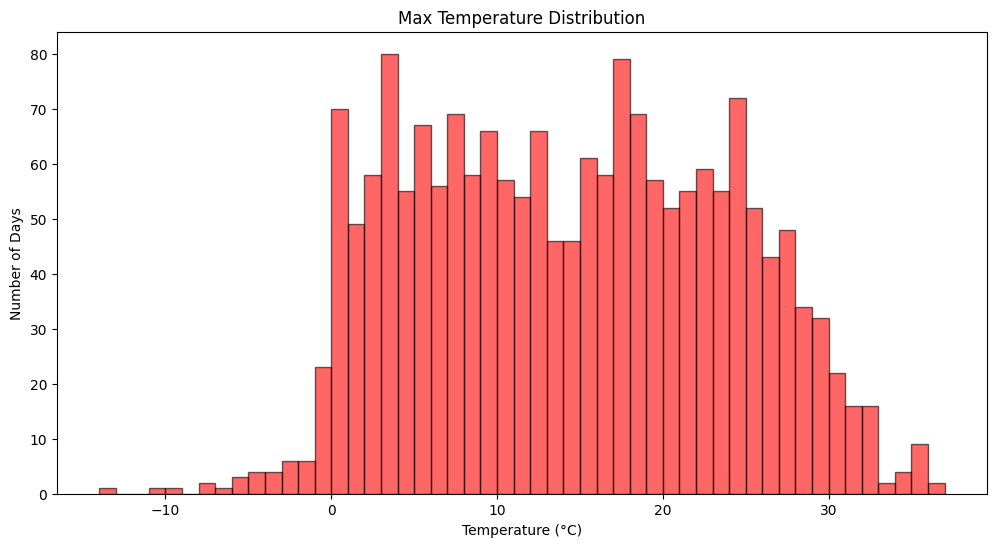

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/visualization_warsaw_weather_dataset.csv', sep=';')

bins_per_degree = df['temp_max'].max() - df['temp_max'].min()

plt.figure(figsize=(12, 6))
plt.hist(df['temp_max'], bins=bins_per_degree, color='red', alpha=0.6, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Days')
plt.title('Maximum Temperature Distribution')
plt.show()


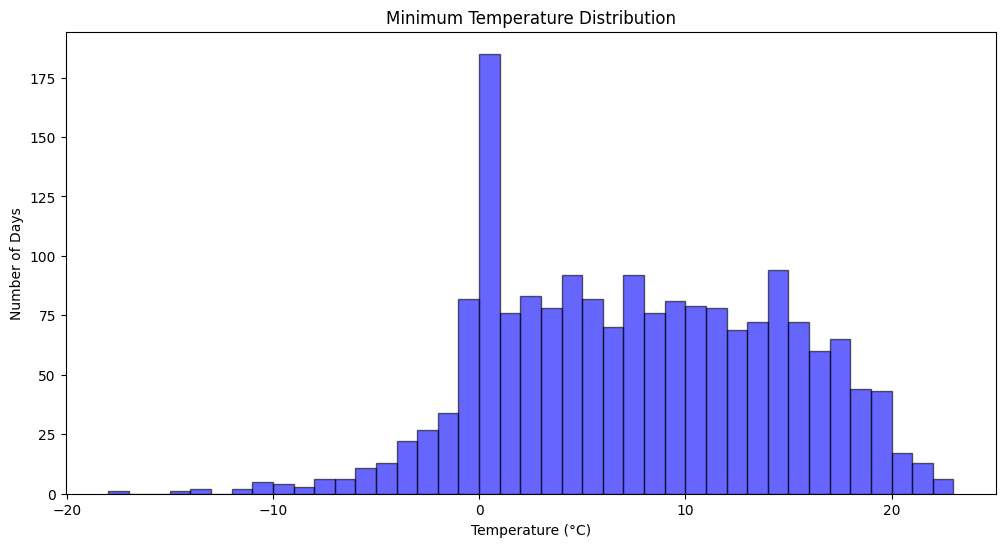

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/visualization_warsaw_weather_dataset.csv', sep=';')

bins_per_degree = df['temp_min'].max() - df['temp_min'].min()

plt.figure(figsize=(12, 6))
plt.hist(df['temp_min'], bins=bins_per_degree, color='blue', alpha=0.6, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Days')
plt.title('Minimum Temperature Distribution')
plt.show()

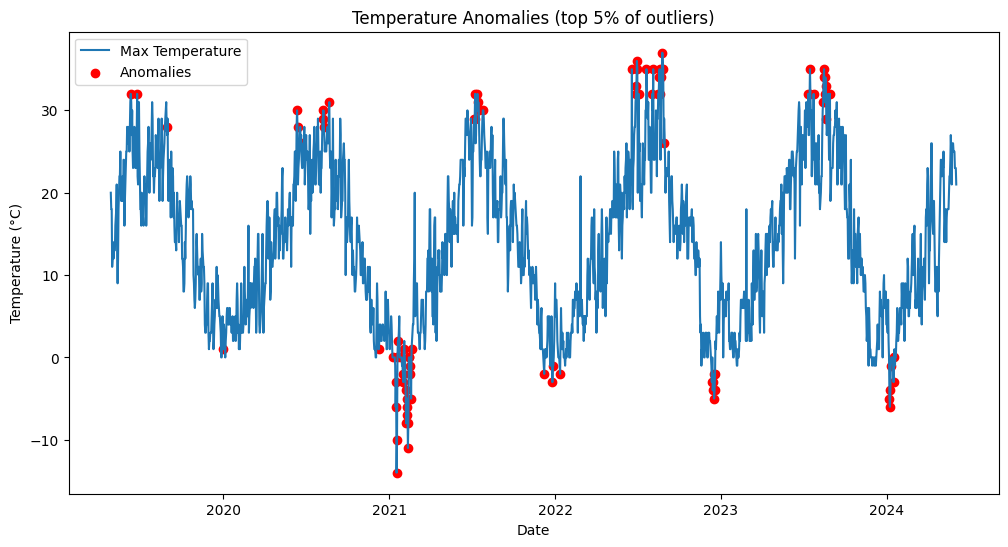

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the data
df = pd.read_csv('datasets/cleaned_warsaw_weather_dataset.csv', sep=';')

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)
df['anomaly'] = iso_forest.fit_predict(df[['temp_max', 'temp_min']])

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temperature')
anomalies = df[df['anomaly'] == -1]
plt.scatter(anomalies['date'], anomalies['temp_max'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Maximum Temperature Anomalies (top 5% of outliers)')
plt.legend()
plt.show()


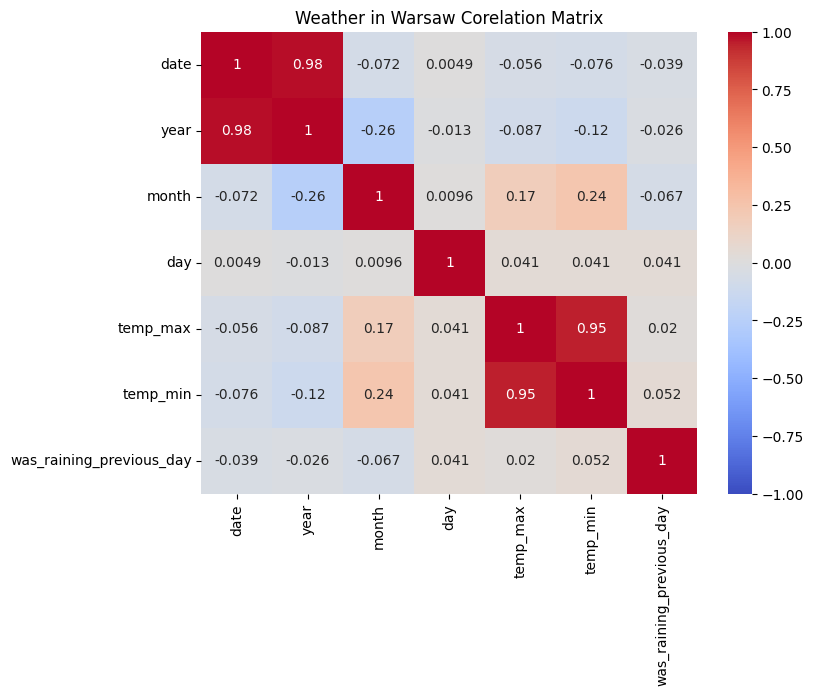

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/cleaned_warsaw_weather_dataset.csv', sep=';')

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

corr_matrix = df[['date', 'year', 'month', 'day', 'temp_max', 'temp_min', 'was_raining_previous_day']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Weather in Warsaw Corelation Matrix')
plt.show()
